# Regressions && Gradient Descent

## Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Generate dummy uniform samples with numpy

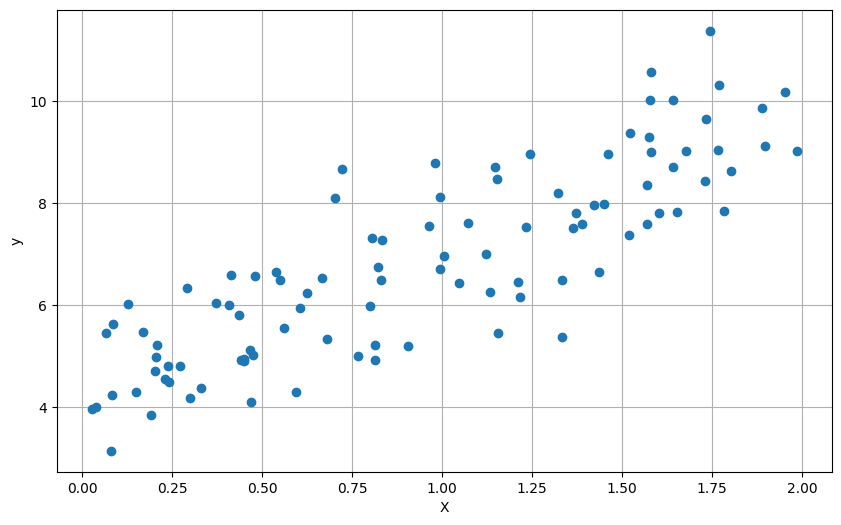

In [4]:
def plot_data(X, y):
    plt.figure(figsize=(10,6))
    plt.plot(X, y, 'o')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("y")
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plot_data(X, y)

#### Normal Equation 
The concept of LR model is to estimate the unknown parameters $\theta$.  
One of the ways to find it, is the Normal Equation. 

> **Normal Equation**  
>  
> $$\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})\mathbf{X}^T\mathbf{y}$$
> where  
> $\hat{\mathbf{\theta}}$ is the value of $\theta$ that minimizes the cost function;  
> $\mathbf{y}$ is the vector of target values, containing from $y_1$ to $y_m$;


In [14]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [16]:
theta_best

array([[3.68436695],
       [3.26725305]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best

Plotting the prediction line

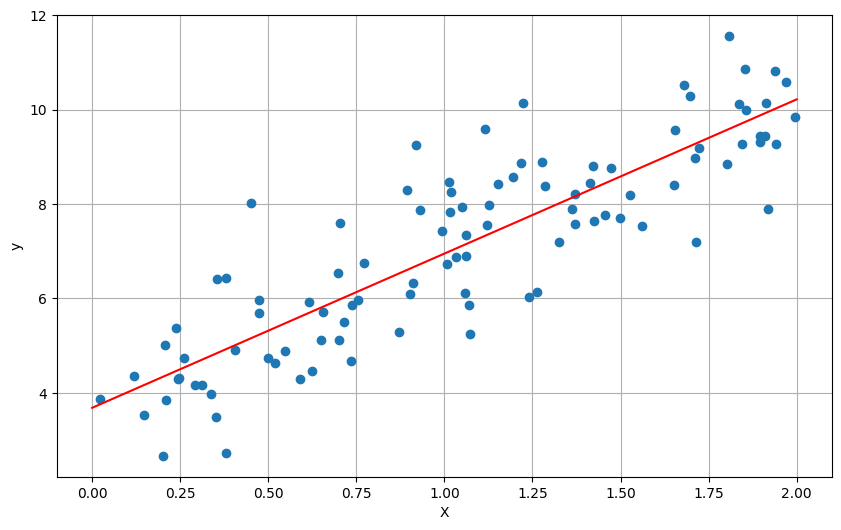

In [19]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'o')
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_new, y_predict, "r-")

Performing the linear regression with scikit

In [1]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

NameError: name 'X' is not defined

In [22]:
lin_reg.predict(X_new)

array([[ 3.68436695],
       [10.21887305]])

The linear regression class is based on numpy's lstsq function

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [24]:
theta_best_svd

array([[3.68436695],
       [3.26725305]])

The functiop computes $\hat{\mathbf{\theta}} = \mathbf{X}^+\mathbf{y}$,  $\mathbf{X}^+$ is a *pseudoinverse* of $\mathbf{X}$. Can be computed via numpy directly as well 

In [25]:
np.linalg.pinv(X_b) @ y

array([[3.68436695],
       [3.26725305]])

Complexity:  
Normal equation - $O(n^{2.4}) \approx O(n^3)$  
Scikit Linear Regression - $O(n^2)$

Once the model is trained, predictions are very fast.

### Gradient descent

GD is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems.  
GD algorithm measures the local gradient of the error function with regard to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum

![a](assets\gradient_descent.png)

#### Batch Gradient Descent

Uses the whole batch of training data at every step

In [45]:
eta = 0.1 
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [46]:
theta

array([[3.68436695],
       [3.26725305]])

#### Stochastic gradient descent

Picks a random instance in the training set at every step and computes the gradients based only on that single instance

In [68]:
n_epochs = 50
t0, t1 = 5, 50
def learning_sched(t):
    return t0 / (t + t1)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        rand_ind = np.random.randint(m)
        xi = X_b[rand_ind: rand_ind + 1]
        yi = y[rand_ind: rand_ind + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_sched(epoch * m + i)
        theta = theta - eta * gradients

In [69]:
theta

array([[3.68361356],
       [3.25511373]])

#### Mini-batch Gradient Descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches

#### Comparisons of algorithms for linear regression

The main point is, there is no huge difference after training, all of the algorithms end up with similar models and make predictions the same way.

| Algorithm         | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn        |
|-------------------|---------|---------------------|---------|-------------|------------------|---------------------|
| Normal equation   | Fast    | No                  | Slow    | 0           | No               | N/A                 |
| SVD               | Fast    | No                  | Slow    | 0           | No               | LinearRegression    |
| Batch GD          | Slow    | No                  | Fast    | 2           | Yes              | N/A                 |
| Stochastic GD     | Fast    | Yes                 | Fast    | ≥2          | Yes              | SGDRegressor        |
| Mini-batch GD     | Fast    | Yes                 | Fast    | ≥2          | Yes              | N/A                 |


## Polynomial Regression

If the data cannot be fitted with just a straight line, linear models can be used to fit it.  
A simple way to do it is adding powers of each feature as new features, then train a linear model on this extended set of features.

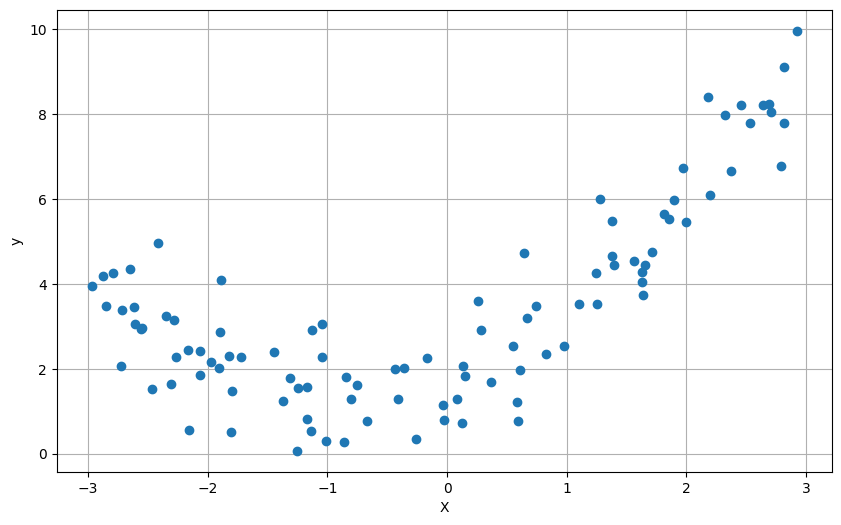

In [5]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plot_data(X, y)

The data above cannot be fitted linearly properly.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

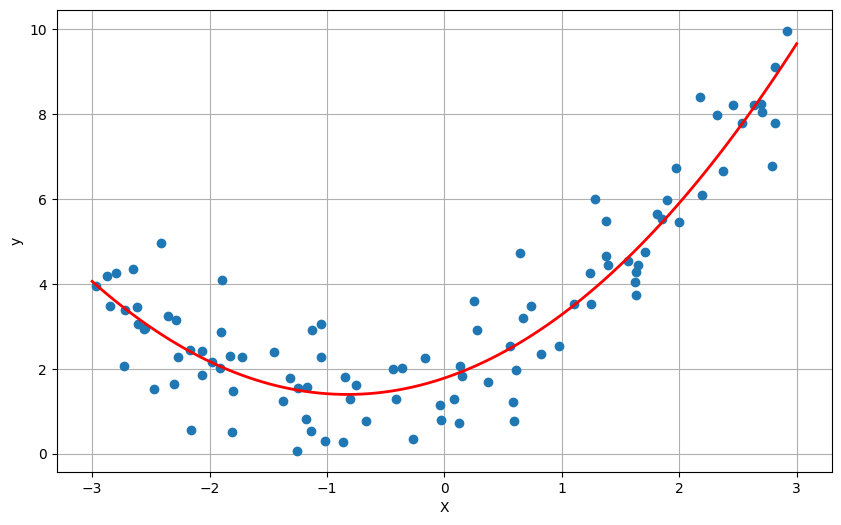

In [11]:
plot_data(X, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")


### Learning Curves

Different degrees of polynomials in the linear regression model can either make the model underfit or overfit.  
One way to check whether the model generalizes well is cross-validation.  
Another way to tell is to look at the learning curves, which are plots of the model’s training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results.

Text(0.5, 0, 'Training set size')

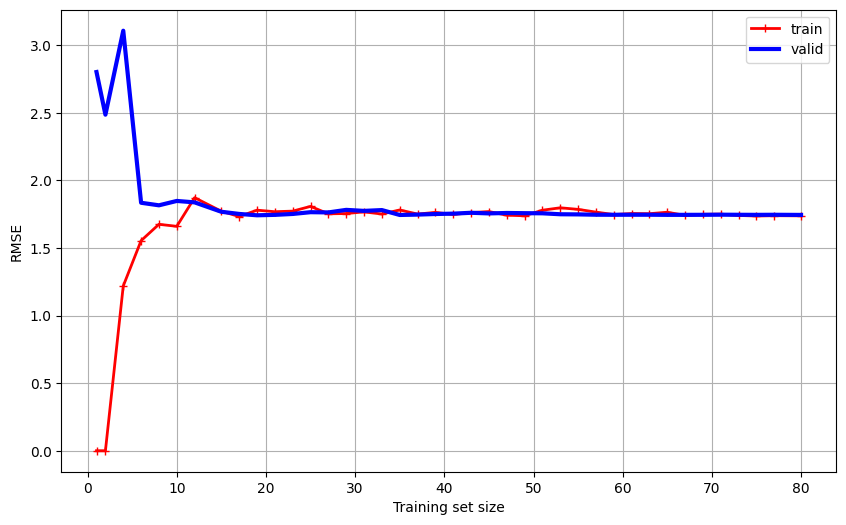

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Training set size")



These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(3.0))

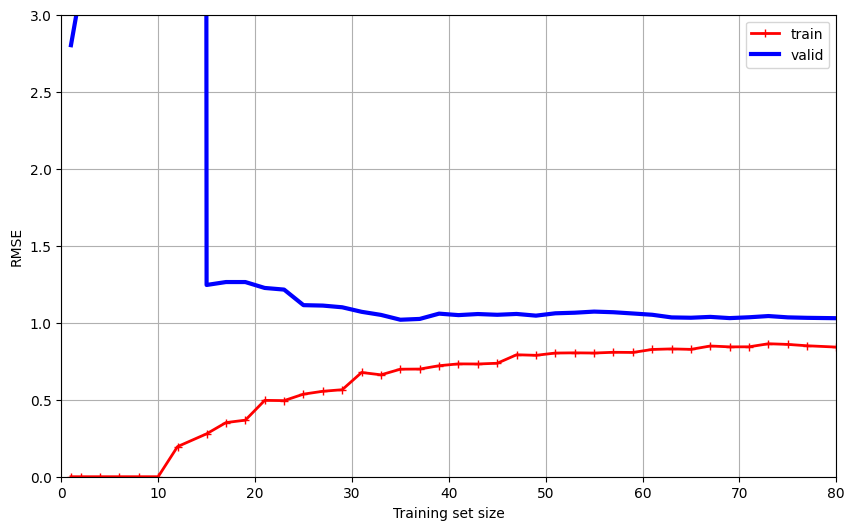

In [21]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Training set size")
plt.axis([0, 80, 0, 3])

The error on the training data is much lower than before.  
There is a gap between the curves.  
These are the signs of overfitting

### Regularized Linear Models


For a linear model, regularization is typically achieved by constraining the weights of the model.

#### Ridge Regression

Regularization term: ${\alpha\over{m}}\sum_{i=1}^n \theta_i^2$. This forces keeping the model weight as small as possible.  
The hyperparameter $\alpha$ controls how much you want to regularize the model.

> ##### Ridge Regression cost function  
> $$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + {\alpha\over{m}}\sum_{i = 1}^n \theta_i^2$$
> *The bias term is not regularized*

> ##### Closed-form solution
> $$ \mathbf{\hat\theta} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{A})^{-1} \mathbf{X}^T\mathbf{y}$$
> $\mathbf{A}$ - $(n + 1) \times (n + 1)$ identity matrix

Example of LR with closed form solution with Scikit-learn

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

#### Lasso Regression

Least absolute shrinkage and selection operator regression.


> ##### Lasso regression cost function
> $$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + 2\alpha \sum_{i = 1}^n |\theta_i|$$

Lasso regression tends to eliminate the weights of the least important features.

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

#### Elastic Net Regression

Middle ground between ridge regression and lasso regression.  
The regularization term is a weighted sum of both ridge and lasso’s regularization terms, and you can control the mix ratio r.  
When r = 0, elastic net is equivalent to ridge regression, and when r = 1, it is equivalent to lasso regression.

> ##### Elastic net cost function
> $$J(\theta) = \text{MSE}(\theta) + r \left( 2 \alpha \sum_{i=1}^n |\theta_i| \right) + (1 - r) \left( \frac{\alpha}{m} \sum_{i=1}^n \theta_i^2 \right)$$

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

#### Early Stopping

Stopping training as soon as the validation error reaches a minimum.

## Logistic Regression

Commonly used to estimate the probability that an instance belongs to a particular class.  
If the estimated probability is greater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class, otherwise it does not.

As well as linear regression, it computes the weightened sum of input features and outputs the logistic of the result.

> ##### Logistic regression model estimated probability
> $$ \hat{p} = h_\theta(\mathbf{x}) = \sigma(\theta^T \mathbf{x})$$
> The logistic—noted $σ(·)$ is a sigmoid function ( $\sigma(t) = {1\over{1 + e ^ {-t}}}$) that outputs a number between 0 and 1.

#### Training and Cost Function

> Cost function of a single training instance
> $$c(\theta) = \begin{cases} -\log(\hat{p})\ & \text{ if } y = 1  \\ -\log (1 - \hat{p}) & \text{if } y = 0\end{cases}

#### Decision Boundaries


In [25]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

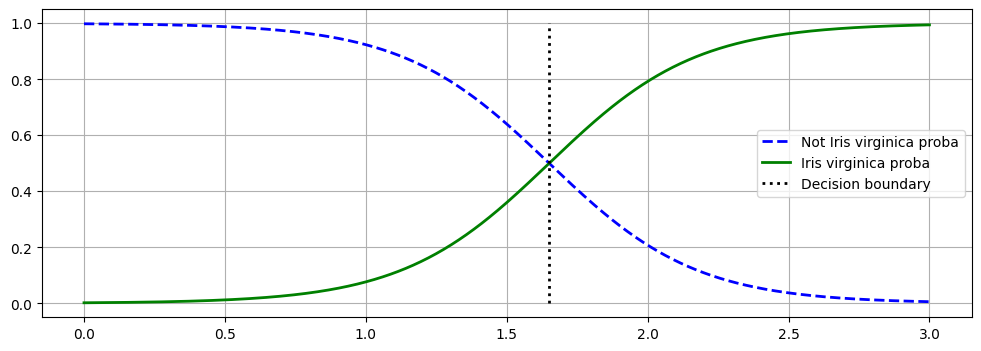

In [31]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
    label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
    label="Decision boundary")
plt.legend()

#### Softmax Regression

The logistic regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers.

When given an instance $\mathbf{x}$, the softmax regression model first computes a score $s_k(\mathbf{x})$ for each class $k$, then estimates the probability of each class by applying the softmax function to the scores.

> ##### Softmax score for class k
> $$ s_k(\mathbf{x}) = (\mathbf{\theta}_k)^T\mathbf{x}

The probability $\hat{p_k}$ can be estimated after computing the score of every class. 

> ##### Softmax function
> $$\hat{p_k} = \sigma(s(\mathbf{x}))_k = {{e^{s_k{\mathbf{x}}} \over \sum_{j = 1}^K e^{s_j{\mathbf{x}}}}}$$
> $K$ is the number of classes;  
$s(\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$;  
$\sigma(s(\mathbf{x}))_k$  is the estimated probability that the instance x belongs to class k, given the scores of each class for that instance.

> ##### Cross entropy cost function
> $$J(\mathbf{\Theta}) = - {1\over{m}}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}\log(\hat{p}_k^{(i)})\$$
> $y_k^{(i)}$ is the target probability that the $i$-th instance belongs to class $k$. In general, it is either equal to 1 or 0.

>##### Cross entropy gradient vector for class k
> $$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^m \left( \hat{p}_k^{(i)} - y_k^{(i)} \right) \mathbf{x}^{(i)}$$


In [32]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [33]:
print(f"{softmax_reg.predict([[5, 2]]) = }\n {softmax_reg.predict_proba([[5, 2]]).round(2)=}")

softmax_reg.predict([[5, 2]]) = array([2])
 softmax_reg.predict_proba([[5, 2]]).round(2)=array([[0.  , 0.04, 0.96]])
